In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

In [2]:
def plot_discrete_function(x, y):
    plt.plot(x, y, 'o')

In [43]:
def root_of_unity(n, k):
    return cmath.exp(2j * cmath.pi * k / n)

def FFT(x):
    n = len(x)
    if n == 1:
        return x
    y0 = FFT(x[0::2])
    y1 = FFT(x[1::2])
    roots_of_unity = np.array([root_of_unity(n, -k) for k in range(n // 2)])
    return np.concatenate((y0 + roots_of_unity * y1, y0 - roots_of_unity * y1))

def FFTReverse(x):
    return np.conj(transform(np.conj(x), -1)) / len(x)

Let's test FFT and FFTReverse on some random tests, comparing it with the functions, defined in np.fft:  

In [64]:
np.random.seed(0)
for i in range(100):
    x = np.random.rand(64) + 1j * np.random.rand(64)
    fft1, fft2 = FFT(x), np.fft.fft(x)
    ifft1, ifft2 = FFTReverse(fft1), np.fft.ifft(fft2)
    assert np.isclose(fft1, fft2).all(), "FFT is incorrect"
    assert np.isclose(ifft1, ifft2).all(), "FFTReverse is incorrect"
print("OK!")

OK!


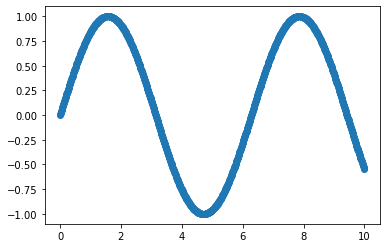

In [12]:
sample_rate = 100
x = np.linspace(0, 10, 10 * sample_rate)
y = np.sin(x)
plot_discrete_function(x, y)